In [1]:
pip install transformers torchvision pillow


Note: you may need to restart the kernel to use updated packages.


Cosine Similarity: 0.8371617
Forged Signature


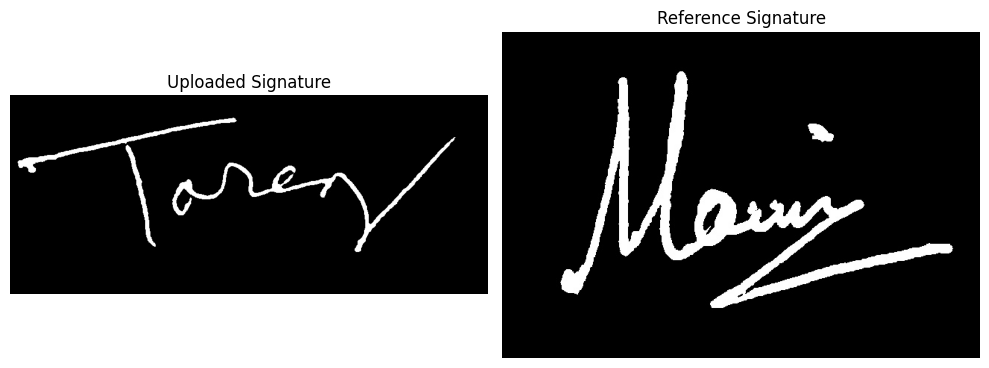

In [9]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt

# Load CLIP model & processor from Hugging Face
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Function to extract normalized image embeddings
def extract_vector(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        image_features = model.get_image_features(**inputs)

    # Convert to NumPy and normalize
    vector = image_features[0].cpu().numpy()
    vector /= np.linalg.norm(vector)
    return vector

#image Path
image_path_uploaded = "check_signature_test_case/process_signature/tareq_1.jpeg"
image_path_stored = "check_signature_test_case/process_signature/mehedy_2.jpeg"

# Load two signatures
vec1 = extract_vector(image_path_uploaded)
vec2 = extract_vector(image_path_stored)

# Cosine similarity function using NumPy
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

similarity = cosine_similarity(vec1, vec2)
print("Cosine Similarity:", similarity)

if similarity >= 0.90:
    print("Genuine Signature")
else:
    print("Forged Signature")

# Cell 8: Visualize both images
uploaded_img = Image.open(image_path_uploaded)
stored_img = Image.open(image_path_stored)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(uploaded_img, cmap='gray')
axs[0].set_title("Uploaded Signature")
axs[0].axis('off')

axs[1].imshow(stored_img, cmap='gray')
axs[1].set_title("Reference Signature")
axs[1].axis('off')

plt.tight_layout()
plt.show()